## Import modules 

In [36]:
import pandas as pd
import numpy as np

from collections import Counter

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_classification
from sklearn.svm import LinearSVC

from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import (SMOTE, BorderlineSMOTE, SVMSMOTE, SMOTENC,
                                    KMeansSMOTE)
from imblearn.over_sampling import RandomOverSampler
from imblearn.base import BaseSampler
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from math import sqrt
from sklearn.metrics import mean_squared_error

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.svm import SVC

print(__doc__)

Automatically created module for IPython interactive environment


In [37]:
import statsmodels.api as sm

# Data Preparation

In [38]:
#infile=r'C:\On going Research Works\Safety Project\Real Time crash Prediction\Data\Normal_day_traffic_aug17\combined Data\data_aug17_2d_mod.csv'

infile1=r'C:\Graduate Courses\Fall 2019\STA 5703\Course_project\data_sep17.csv'
infile2=r'C:\Graduate Courses\Fall 2019\STA 5703\Course_project\data5_sep17.csv'
infile3=r'C:\Graduate Courses\Fall 2019\STA 5703\Course_project\data_aug17.csv'
infile4=r'C:\Graduate Courses\Fall 2019\STA 5703\Course_project\data5_aug17.csv'

df1=pd.read_csv(infile1,parse_dates=['measurement_start'])
df1['Evc']=1

df2=pd.read_csv(infile2,parse_dates=['measurement_start'])
df2['Evc']=1

df3=pd.read_csv(infile3,parse_dates=['measurement_start'])
df3['Evc']=0

df4=pd.read_csv(infile4,parse_dates=['measurement_start'])
df4['Evc']=0


In [39]:
df=df1.append(df2,ignore_index=True)
df=df.append(df3,ignore_index=True)
df=df.append(df4,ignore_index=True)

In [40]:
df['Standardized Type']=df['Standardized Type'].fillna(0)
df['Standardized Type']=df['Standardized Type'].replace({'Collision':1})
df['hour']=df['measurement_start'].dt.hour
df['day']=df['measurement_start'].dt.weekday
df['hour']=df['hour'].replace({0:24})

In [41]:
df['cvs_x']=df['std_speed_x']/df['speed_x']
df['cvs_y']=df['std_speed_y']/df['speed_y']
df['cvs_x1']=df['std_speed_x1']/df['speed_x1']
df['cvs_y1']=df['std_speed_y1']/df['speed_y1']

In [42]:
df=df.dropna(how='any')

In [43]:
df_crash=df.copy()
col_name=list(df_crash.columns)
col_name

['zone_id_x',
 'measurement_start',
 'speed_x',
 'volume_x',
 'occupancy_x',
 'std_speed_x',
 'std_volume_x',
 'std_occ_x',
 'speed_y',
 'volume_y',
 'occupancy_y',
 'std_speed_y',
 'std_volume_y',
 'std_occ_y',
 'speed_x1',
 'volume_x1',
 'occupancy_x1',
 'std_speed_x1',
 'std_volume_x1',
 'std_occ_x1',
 'speed_y1',
 'volume_y1',
 'occupancy_y1',
 'std_speed_y1',
 'std_volume_y1',
 'std_occ_y1',
 'Standardized Type',
 'Evc',
 'hour',
 'day',
 'cvs_x',
 'cvs_y',
 'cvs_x1',
 'cvs_y1']

In [44]:
col_name=['volume_y','cvs_y1','Evc']

In [45]:
df_acc=df_crash[df_crash['Standardized Type']==1]
df_acc=df_acc.reset_index(drop=True)
len(df_acc)

138

In [46]:
#df_acc=df_crash[(df_crash['Standardized Type']==1) & (df_crash['Evc']==1)]

In [47]:
len(df_acc)

138

## Model Development Unbalance Sample

In [48]:
x_vals=df_crash.filter(col_name)
x_vals['constant']=1
y_vals=df_crash['Standardized Type']

In [49]:
import numpy as np

#data_features_name=['speed_x','std_speed_x','volume_x','occupancy_x','speed_y','std_speed_y','volume_y','occupancy_y','evc','accident']

import statsmodels.api as sm
logit_model=sm.Logit(y_vals,x_vals)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.002207
         Iterations 13
                          Results: Logit
Model:              Logit             Pseudo R-squared: 0.032     
Dependent Variable: Standardized Type AIC:              2496.1411 
Date:               2019-12-05 17:36  BIC:              2541.1106 
No. Observations:   563748            Log-Likelihood:   -1244.1   
Df Model:           3                 LL-Null:          -1285.5   
Df Residuals:       563744            LLR p-value:      7.7153e-18
Converged:          1.0000            Scale:            1.0000    
No. Iterations:     13.0000                                       
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
volume_y       0.0049    0.0010    4.8141  0.0000   0.0029   0.0069
cvs_y1         0.8459    0.2344    3.6083  0.000

In [50]:
len

<function len(obj, /)>

## Balance Data

### Case-Control : Done in R
##### code will be given with paper 

In [51]:
y=df_crash['Standardized Type']
df_crash.drop(['Standardized Type','measurement_start','zone_id_x','hour','day'],1,inplace=True)
X=df_crash.values

#### Test Train Split

In [52]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=0)

## OverSampling 

#### SMOTE

In [53]:
from imblearn.over_sampling import SMOTE, ADASYN
X_resampled5, y_resampled5 = SMOTE().fit_resample(X_train, y_train)

#use this comment to run the ADASYN
#X_resampled5, y_resampled5 = ADASYN().fit_resample(X_train, y_train)

print(sorted(Counter(y_resampled5).items()))

[(0, 422702), (1, 422702)]


In [54]:
def Roc_curve (model,mod_name):
    # generate a no skill prediction (majority class)
    ns_probs = [0 for _ in range(len(y_test))]
    # predict probabilities
    lr_probs = model.predict_proba(X_test)
    # keep probabilities for the positive outcome only
    lr_probs = lr_probs[:, 1]
    # calculate scores
    print("Accuracy on training set: {:.3f}".format(model.score(X_resampled5, y_resampled5)))
    print("Accuracy on test set: {:.3f}".format(model.score(X_test, y_test)))
    ns_auc = roc_auc_score(y_test, ns_probs)
    lr_auc = roc_auc_score(y_test, lr_probs)
    # summarize scores
    print('No Skill: ROC AUC=%.3f' % (ns_auc))
    print('ROC AUC=%.3f' % (lr_auc))
    # calculate roc curves
    plt.figure()
    ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
    # plot the roc curve for the model
    plt.figure(figsize=(10,6))
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    plt.plot(lr_fpr, lr_tpr, marker='.', label=str(mod_name))
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()

    #RMSE= sqrt(mean_squared_error(y_test, y_pred))
    #print("r2=", r2_score(y_test, y_pred))

In [55]:
df_crash.head()

,speed_x,volume_x,occupancy_x,std_speed_x,std_volume_x,std_occ_x,speed_y,volume_y,occupancy_y,std_speed_y,...,volume_y1,occupancy_y1,std_speed_y1,std_volume_y1,std_occ_y1,Evc,cvs_x,cvs_y,cvs_x1,cvs_y1
0,60.729961,285,5.133333,9.204505,4.690416,1.429841,63.550415,255,4.555556,3.028592,...,287,10.911111,13.347911,4.389381,4.880259,1,0.151564,0.047657,0.042323,0.379286
1,26.167723,169,7.400000,1.556336,1.533747,1.273665,56.898236,195,4.177778,2.964019,...,202,6.533333,9.805603,3.090693,3.070081,1,0.059475,0.052093,0.034950,0.273914
2,20.494546,248,21.822222,9.567672,3.681356,9.485885,21.617413,255,15.000000,2.705743,...,202,16.022222,7.881925,3.136574,6.702838,1,0.466840,0.125165,0.159292,0.484058
3,51.513174,259,5.333333,3.310147,3.473711,1.583647,23.577924,267,15.333333,2.666520,...,198,21.000000,2.800242,2.677952,8.631798,1,0.064258,0.113094,0.073018,0.240163
4,22.227364,205,29.444444,2.518384,2.968084,7.291729,9.566391,171,17.911111,4.512452,...,239,30.066667,2.574593,5.091543,7.999206,1,0.113301,0.471698,0.276434,0.098161


### Naive Bayes

#### Unblanced Data

In [56]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
model=classifier.fit(X_train, y_train)
y_nb=model.predict(X_test)

Accuracy on training set: 0.621
Accuracy on test set: 0.933
No Skill: ROC AUC=0.500
ROC AUC=0.701


<Figure size 432x288 with 0 Axes>

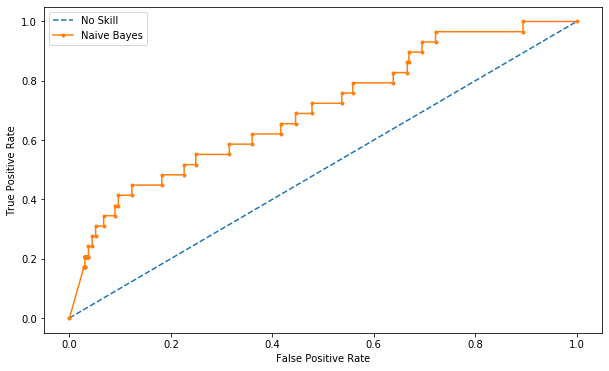

[[131553   9355]
 [    20      9]]
              precision    recall  f1-score   support

           0       1.00      0.93      0.97    140908
           1       0.00      0.31      0.00        29

    accuracy                           0.93    140937
   macro avg       0.50      0.62      0.48    140937
weighted avg       1.00      0.93      0.97    140937



In [57]:
Roc_curve(model,'Naive Bayes')
print(confusion_matrix(y_test, y_nb))
print(classification_report(y_test, y_nb))

#### Resampled

In [58]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
model=classifier.fit(X_resampled5, y_resampled5)
y_nb=model.predict(X_test)

Accuracy on training set: 0.672
Accuracy on test set: 0.904
No Skill: ROC AUC=0.500
ROC AUC=0.732


<Figure size 432x288 with 0 Axes>

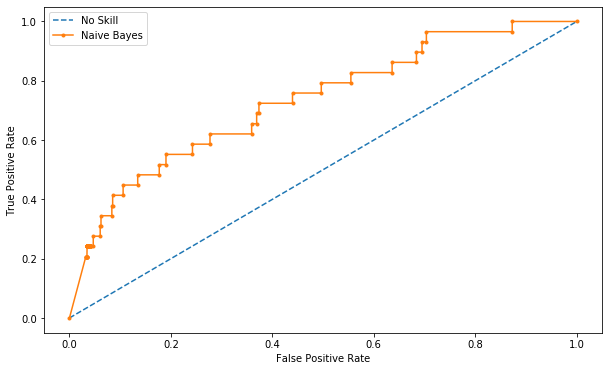

[[127433  13475]
 [    17     12]]
              precision    recall  f1-score   support

           0       1.00      0.90      0.95    140908
           1       0.00      0.41      0.00        29

    accuracy                           0.90    140937
   macro avg       0.50      0.66      0.48    140937
weighted avg       1.00      0.90      0.95    140937



In [59]:
Roc_curve(model,'Naive Bayes')
print(confusion_matrix(y_test, y_nb))
print(classification_report(y_test, y_nb))

### KNN classification

#### Unblanced Data

In [60]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=250) 
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=250, p=2,
                     weights='uniform')

Accuracy on training set: 0.672
Accuracy on test set: 0.904
No Skill: ROC AUC=0.500
ROC AUC=0.732


<Figure size 432x288 with 0 Axes>

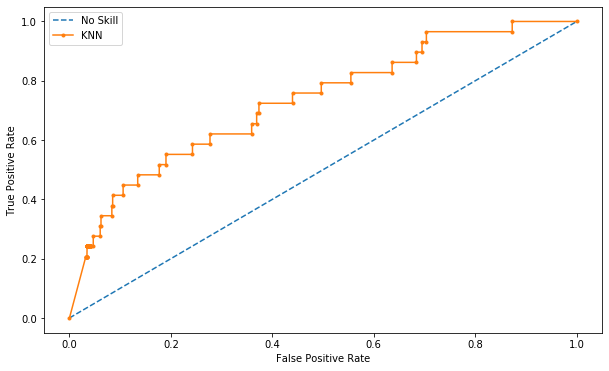

[[140908      0]
 [    29      0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    140908
           1       0.00      0.00      0.00        29

    accuracy                           1.00    140937
   macro avg       0.50      0.50      0.50    140937
weighted avg       1.00      1.00      1.00    140937



C:\Users\re698843\AppData\Local\conda\conda\envs\statmodel3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [61]:
y_knn = knn.predict(X_test)
Roc_curve(model,'KNN')
print(confusion_matrix(y_test, y_knn))
print(classification_report(y_test, y_knn))

#### Resampled

In [62]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=250) 
knn.fit(X_resampled5, y_resampled5)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=250, p=2,
                     weights='uniform')

Accuracy on training set: 0.672
Accuracy on test set: 0.904
No Skill: ROC AUC=0.500
ROC AUC=0.732


<Figure size 432x288 with 0 Axes>

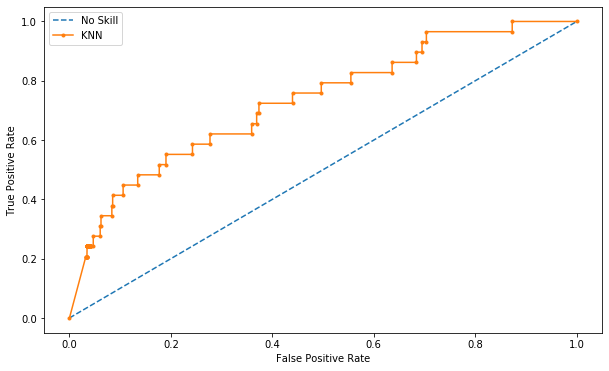

[[124822  16086]
 [    19     10]]
              precision    recall  f1-score   support

           0       1.00      0.89      0.94    140908
           1       0.00      0.34      0.00        29

    accuracy                           0.89    140937
   macro avg       0.50      0.62      0.47    140937
weighted avg       1.00      0.89      0.94    140937



In [63]:
y_knn = knn.predict(X_test)
Roc_curve(model,'KNN')
print(confusion_matrix(y_test, y_knn))
print(classification_report(y_test, y_knn))

### Logistic Regression

#### Unbalanced Sample

In [64]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)
model=clf.fit(X_train, y_train)

C:\Users\re698843\AppData\Local\conda\conda\envs\statmodel3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy on training set: 0.500
Accuracy on test set: 1.000
No Skill: ROC AUC=0.500
ROC AUC=0.769


<Figure size 432x288 with 0 Axes>

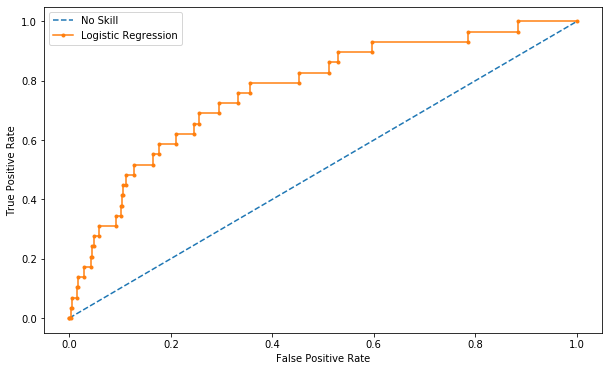

[[140908      0]
 [    29      0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    140908
           1       0.00      0.00      0.00        29

    accuracy                           1.00    140937
   macro avg       0.50      0.50      0.50    140937
weighted avg       1.00      1.00      1.00    140937



C:\Users\re698843\AppData\Local\conda\conda\envs\statmodel3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [65]:
y_logit = model.predict(X_test)
Roc_curve(model,'Logistic Regression')
print(confusion_matrix(y_test, y_logit))
print(classification_report(y_test, y_logit))

#### Resampled

In [66]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)
model=clf.fit(X_resampled5, y_resampled5)

C:\Users\re698843\AppData\Local\conda\conda\envs\statmodel3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy on training set: 0.771
Accuracy on test set: 0.820
No Skill: ROC AUC=0.500
ROC AUC=0.770


<Figure size 432x288 with 0 Axes>

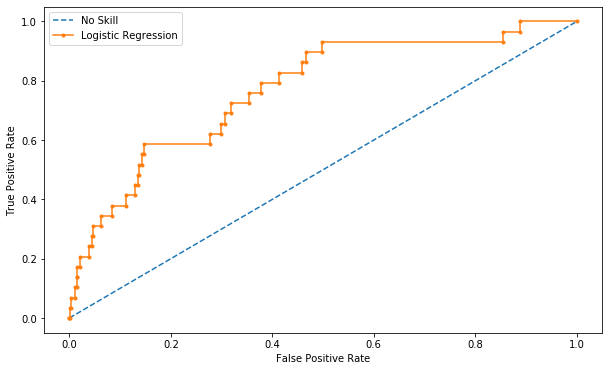

[[115582  25326]
 [    12     17]]
              precision    recall  f1-score   support

           0       1.00      0.82      0.90    140908
           1       0.00      0.59      0.00        29

    accuracy                           0.82    140937
   macro avg       0.50      0.70      0.45    140937
weighted avg       1.00      0.82      0.90    140937



In [67]:
y_logit = model.predict(X_test)
Roc_curve(model,'Logistic Regression')
print(confusion_matrix(y_test, y_logit))
print(classification_report(y_test, y_logit))

#### LDA

#### Ubalance data

In [68]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)
model=clf.fit(X_train, y_train)

Accuracy on training set: 0.527
Accuracy on test set: 0.996
No Skill: ROC AUC=0.500
ROC AUC=0.762


<Figure size 432x288 with 0 Axes>

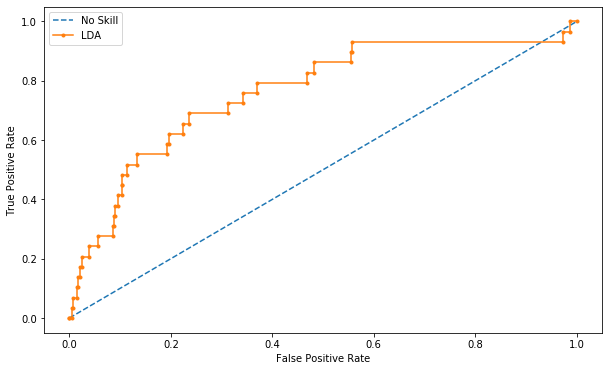

[[140405    503]
 [    29      0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    140908
           1       0.00      0.00      0.00        29

    accuracy                           1.00    140937
   macro avg       0.50      0.50      0.50    140937
weighted avg       1.00      1.00      1.00    140937



In [69]:
y_lda = model.predict(X_test)
Roc_curve(model,'LDA')
print(confusion_matrix(y_test, y_lda))
print(classification_report(y_test, y_lda))

#### Resampled

In [70]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)
model=clf.fit(X_resampled5, y_resampled5)

Accuracy on training set: 0.764
Accuracy on test set: 0.834
No Skill: ROC AUC=0.500
ROC AUC=0.789


<Figure size 432x288 with 0 Axes>

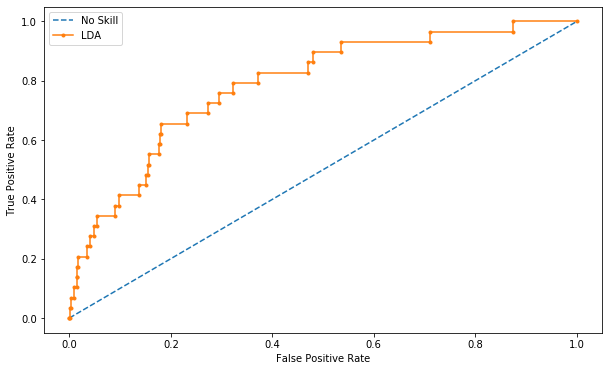

[[117530  23378]
 [    13     16]]
              precision    recall  f1-score   support

           0       1.00      0.83      0.91    140908
           1       0.00      0.55      0.00        29

    accuracy                           0.83    140937
   macro avg       0.50      0.69      0.46    140937
weighted avg       1.00      0.83      0.91    140937



In [71]:
y_lda = model.predict(X_test)
Roc_curve(model,'LDA')
print(confusion_matrix(y_test, y_lda))
print(classification_report(y_test, y_lda))

### QDA

#### Unblanced Sample

In [72]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
clf = QuadraticDiscriminantAnalysis()
model=clf.fit(X_train, y_train)

Accuracy on training set: 0.638
Accuracy on test set: 0.955
No Skill: ROC AUC=0.500
ROC AUC=0.783


<Figure size 432x288 with 0 Axes>

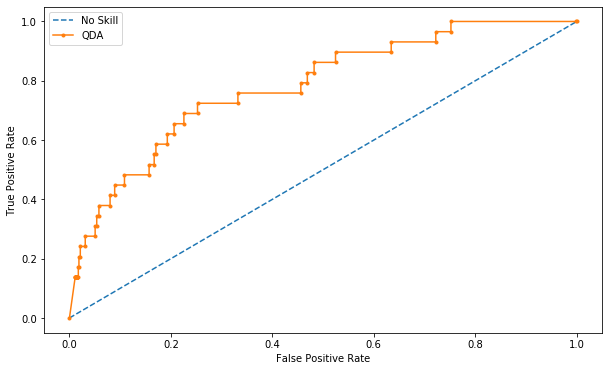

[[134596   6312]
 [    21      8]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98    140908
           1       0.00      0.28      0.00        29

    accuracy                           0.96    140937
   macro avg       0.50      0.62      0.49    140937
weighted avg       1.00      0.96      0.98    140937



In [73]:
y_qda = model.predict(X_test)
Roc_curve(model,'QDA')
print(confusion_matrix(y_test, y_qda))
print(classification_report(y_test, y_qda))

#### Resampled

In [74]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
clf = QuadraticDiscriminantAnalysis()
model=clf.fit(X_resampled5, y_resampled5)

Accuracy on training set: 0.795
Accuracy on test set: 0.798
No Skill: ROC AUC=0.500
ROC AUC=0.751


<Figure size 432x288 with 0 Axes>

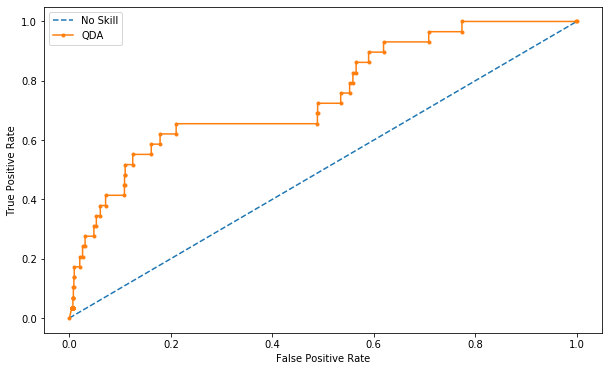

[[112507  28401]
 [    11     18]]
              precision    recall  f1-score   support

           0       1.00      0.80      0.89    140908
           1       0.00      0.62      0.00        29

    accuracy                           0.80    140937
   macro avg       0.50      0.71      0.44    140937
weighted avg       1.00      0.80      0.89    140937



In [75]:
y_qda = model.predict(X_test)
Roc_curve(model,'QDA')
print(confusion_matrix(y_test, y_qda))
print(classification_report(y_test, y_qda))